# Model Size & Report Graph

<br>

### Model Size

In [2]:
import os 
import torch
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [9]:
file_path = 'vit_cifar10/log_checkpoint/' + 'quant8_vit_cifar10' + '/saves/' + 'quant8_vit_cifar10' + '.0.pth.tar'
model = torch.load(file_path)

In [13]:
file_path = 'vit_cifar10/log_checkpoint/' + 'vit_cifar10' + '/saves/' + 'vit_cifar10' + '.0.pth.tar'
model = torch.load(file_path)

In [10]:
param_size = 0
buffer_size = 0
for key, val in model['model_state_dict'].items():
    param_size += val.nelement() * val.element_size()

# for buffer in model.buffers():
    # buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size) / 1024**2
print('Size: {:.3f} MB'.format(size_all_mb))

Size: 13.663 MB


In [10]:
param_size = 0
buffer_size = 0
for key, val in model['model_state_dict'].items():
    param_size += val.nelement() * val.element_size()

# for buffer in model.buffers():
    # buffer_size += buffer.nelement() * buffer.element_size()

size_all_mb = (param_size) / 1024**2
print('Size: {:.3f} MB'.format(size_all_mb))

Size: 13.663 MB


In [ ]:
for key, val in model['model_state_dict'].items():
    print(val)

In [8]:
with open("parameters.txt", "a") as f:
    for key, val in model['model_state_dict'].items():
        f.write(key + "\n")

In [8]:
with open("model2.txt", "a") as f:
    for k, v in model.items():
        source_list = []
        source_list.append("\n")
        source_list.append(str(k))
        source_list.append(str(v))
        f.write("\n".join(source_list))      

In [20]:
def get_size(path):
        size = os.path.getsize(path)
        if size < 1024:
            return f"{size} bytes"
        elif size < pow(1024,2):
            return f"{round(size/1024, 2)} KB"
        elif size < pow(1024,3):
            return f"{round(size/(pow(1024,2)), 2)} MB"
        elif size < pow(1024,4):
            return f"{round(size/(pow(1024,3)), 2)} GB"

model_name = [model.replace('_log_df', '') for model in model_name]
for model in model_name:
    model_path = 'vit_cifar10/log_checkpoint/' + model + '/saves/' + model + '.49.pth.tar'
    model_size = get_size(model_path) 
    print('File Path:', model_path)
    print('File Size:', model_size)

File Path: vit_cifar10/log_checkpoint/vit_cifar10/saves/vit_cifar10.49.pth.tar
File Size: 41.12 MB
File Path: vit_cifar10/log_checkpoint/quant2_vit_cifar10/saves/quant2_vit_cifar10.49.pth.tar
File Size: 41.12 MB
File Path: vit_cifar10/log_checkpoint/quant4_vit_cifar10/saves/quant4_vit_cifar10.49.pth.tar
File Size: 41.12 MB
File Path: vit_cifar10/log_checkpoint/quant8_vit_cifar10/saves/quant8_vit_cifar10.49.pth.tar
File Size: 41.12 MB


In [26]:
model = "all_quant8_vit_cifar10"
model_path = 'vit_cifar10/log_checkpoint/' + model + '/saves/' + model + '.0.pth.tar'
model_size = get_size(model_path) 
print('File Path:', model_path)
print('File Size:', model_size)

File Path: vit_cifar10/log_checkpoint/all_quant8_vit_cifar10/saves/all_quant8_vit_cifar10.0.pth.tar
File Size: 41.12 MB


### Report Graph

In [ ]:
def load_xlsx_file(path):
    
    model_name = []
    path = path
    xlsx_files = glob.glob(os.path.join(path, "*.xlsx"))   
    xlsx_files = sorted(xlsx_files, reverse=False)
    xlsx_files = sorted(xlsx_files, key=len)

    log_dfs = {}
    
    for xlsx_file in xlsx_files:
        xlsx_file_name = xlsx_file.split("/")[2]
        log_df = pd.read_excel(xlsx_file, engine='openpyxl')
        log_dfs[xlsx_file_name] = log_df.round(4)
        
    print("Log Dataframe\n")

    for key, value in log_dfs.items():
        df_name = key.split(".")[0] + "_df"
        print(df_name)
        globals()[df_name] = value
        df_name = df_name.replace("_cifar10_log_df", "Vision Transformer").replace("vit", "Bit ").replace("quant", "").replace("_", "")
        if str.isdigit(df_name[0]) == False:
            df_name = df_name.replace("Bit", "")
            df_name = df_name.strip()
        model_name.append(df_name)
        
    return model_name

In [ ]:
path = "vit_cifar10/log"
model_name = load_xlsx_file(path)

Log Dataframe

vit_cifar10_log_df
quant2_vit_cifar10_log_df
quant4_vit_cifar10_log_df
quant8_vit_cifar10_log_df


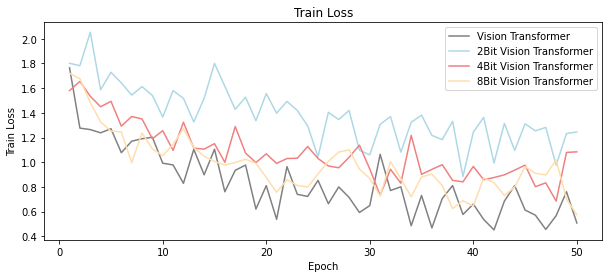

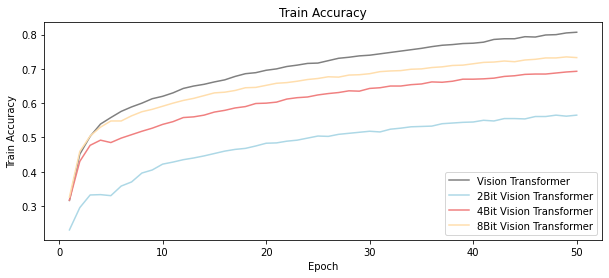

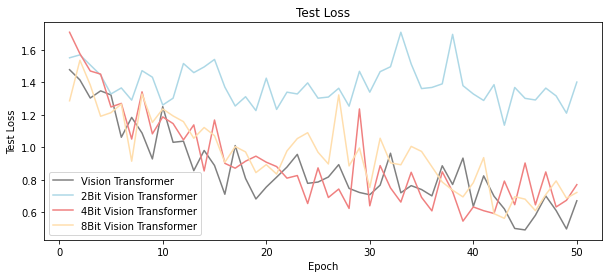

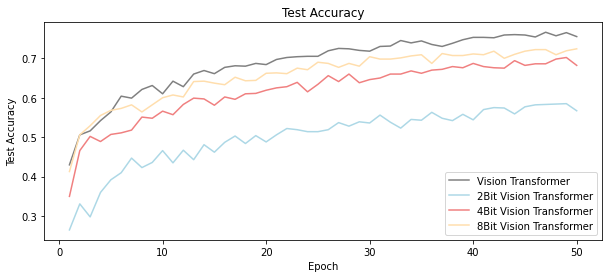

In [ ]:
loss_epoch = round(vit_cifar10_log_df['Epoch'], 3)

train_loss_0 = round(vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_0 = round(vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_0 = round(vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_0 = round(vit_cifar10_log_df['Test Accuracy'], 3)

train_loss_1 = round(quant8_vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_1 = round(quant8_vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_1 = round(quant8_vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_1 = round(quant8_vit_cifar10_log_df['Test Accuracy'], 3)

train_loss_2 = round(quant4_vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_2 = round(quant4_vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_2 = round(quant4_vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_2 = round(quant4_vit_cifar10_log_df['Test Accuracy'], 3)

train_loss_3 = round(quant2_vit_cifar10_log_df['Train Loss'], 3)
train_accuracy_3 = round(quant2_vit_cifar10_log_df['Train Accuracy'], 3)
test_loss_3 = round(quant2_vit_cifar10_log_df['Test Loss'], 3)
test_accuracy_3 = round(quant2_vit_cifar10_log_df['Test Accuracy'], 3)


linestyle_list = ['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted']
linecolor_list = ['grey', 'lightblue', 'lightcoral', 'navajowhite', 'lightgreen', 'lavender']
# https://matplotlib.org/stable/gallery/color/named_colors.html

def make_plot_text(epoch, value):
    for i, v in enumerate(epoch):
        plt.text(v, value[i], value[i], 
                fontsize = 9, color='black', ha="left",
                horizontalalignment='center', verticalalignment='bottom')  
    
plt.figure(figsize=(10, 4))
plt.plot(loss_epoch, train_loss_0, color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, train_loss_1, color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[4])  
plt.plot(loss_epoch, train_loss_2, color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, train_loss_3, color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[4]) 
plt.xlabel('Epoch'); plt.ylabel('Training Loss') 

plt.title('Training Loss')
plt.legend() 
plt.savefig('vit_cifar10/plot/0921/train_loss.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(10, 4))
plt.plot(loss_epoch, train_accuracy_0, color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, train_accuracy_1, color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[4])  
plt.plot(loss_epoch, train_accuracy_2, color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, train_accuracy_3, color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[4]) 
plt.xlabel('Epoch'); plt.ylabel('Training Accuracy') 

plt.title('Training Accuracy')
plt.legend() 
plt.savefig('vit_cifar10/plot/0921/train_accuracy.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(10, 4))
plt.plot(loss_epoch, test_loss_0, color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, test_loss_1, color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[4])  
plt.plot(loss_epoch, test_loss_2, color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, test_loss_3, color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[4]) 
plt.xlabel('Epoch'); plt.ylabel('Test Loss') 

plt.title('Test Loss')
plt.legend() 
plt.savefig('vit_cifar10/plot/0921/test_loss.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()


plt.figure(figsize=(10, 4))
plt.plot(loss_epoch, test_accuracy_0, color=linecolor_list[0], label=model_name[0], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, test_accuracy_1, color=linecolor_list[1], label=model_name[1], linestyle=linestyle_list[4])  
plt.plot(loss_epoch, test_accuracy_2, color=linecolor_list[2], label=model_name[2], linestyle=linestyle_list[4]) 
plt.plot(loss_epoch, test_accuracy_3, color=linecolor_list[3], label=model_name[3], linestyle=linestyle_list[4]) 
plt.xlabel('Epoch'); plt.ylabel('Test Accuracy') 

plt.title('Test Accuracy')
plt.legend() 
plt.savefig('vit_cifar10/plot/0921/test_accuracy.png', facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

## Reference

**Paper**
<br/>[Vaswani et al. Attention is All You Need. NeurIPS, 2017](https://arxiv.org/abs/1706.03762)
<br/>[Hubara et al. Quantized Neural Networks: Training Neural Networks with Low Precision Weights and Activations, 2018](https://arxiv.org/abs/2010.11929)
<br/>[Alexey et al. An Image Is Worth 16x16 Words: Transformers for Image Recognition at Scale, ICLR, 2021](https://arxiv.org/abs/2010.11929)

<br/>**Github**
<br/>[Huggingface Vision Transformers](https://github.com/huggingface/pytorch-image-models/blob/main/timm/models/vision_transformer.py)
<br/>[Andrew-Tierno/QuantizedTransformer](https://github.com/Andrew-Tierno/QuantizedTransformer)